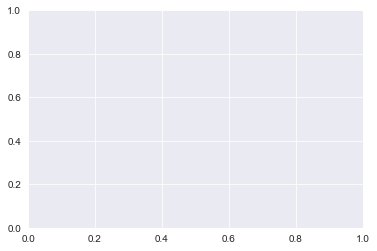

In [1]:
%matplotlib inline
import da
from da import DataFrameHandler as dd
from da import PltHelper as ph
from da import SklearnHelper as sh
from da import UsageFunctions as uf

In [2]:
# ti_path = "../../datasets/ieee-fraud-detection/test_identity.csv";
tt_path = "../../datasets/ieee-fraud-detection/test_transaction.csv";
# test_path = "test.csv";

In [3]:
import pandas as pd
tt_df = pd.read_csv(tt_path)
# ti_df = pd.read_csv(ti_path)
# test_df = pd.read_csv(test_path)

In [4]:
tt_ddf = dd.DataFrameHandler(tt_df)
# ti_ddf = dd.DataFrameHandler(ti_df)
# test_ddf = dd.DataFrameHandler(test_df)

In [5]:
# tt_ddf.get_numerical_cols()

In [6]:
# list(tt_ddf.df.columns)

In [7]:
dct_col_type = {
    'C1':str,
    'addr1':str,
    'addr2':str
}

In [8]:
tt_ddf.set_cols_type(dct_col_type)#get_numerical_cols()

[DONE]: ('Change dtype@', 'C1', ' : ', 'float64', '->', "<class 'str'>") 

[DONE]: ('Change dtype@', 'addr1', ' : ', 'float64', '->', "<class 'str'>") 

[DONE]: ('Change dtype@', 'addr2', ' : ', 'float64', '->', "<class 'str'>") 



In [9]:
# dct_num_col_info = test_ddf.get_info_df_numerical_cols()
dct_num_col_info = tt_ddf.get_info_df_numerical_cols()

[DONE]: Get describe 

[DONE]: Get qunatile 

[DONE]: Get median 



In [10]:
# dct_num_col_info['feature']

In [11]:
# dct_str_col_info = test_ddf.get_info_df_str_cols()
dct_str_col_info = tt_ddf.get_info_df_str_cols()

[DONE]: Get unique info 

[DONE]: Get null info 

[DONE]: Get dtype info 



In [12]:
# dct_num_col_info['feature']

In [13]:
# dct_str_col_info['feature']

In [14]:
dct_str_col_info['cat']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151,1152,1153,1154,1155,1156,1157,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167,1168,1169,1170,1171,1172,1173,1174
ProductCD,C,H,R,S,W,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
card4,american express,discover,mastercard,visa,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,

In [15]:
a = tt_ddf.df.M1.astype(str)#.dtype#get_numerical_cols()

In [16]:
a.dtype

dtype('O')

## 海外かどうか
- TransactionAmtは小数は為替レート
- is_overseaを新規に設置

In [18]:
tt_ddf.df['is_oversea'] = tt_ddf.df['TransactionAmt'] - tt_ddf.df['TransactionAmt'].astype(int) > 0

In [20]:
tt_ddf.df['is_oversea'] = tt_ddf.df['is_oversea'].apply(lambda x : x!=0)

## ADDR
- addr1 as billing region
- addr2 as billing country”

In [23]:
col1 = 'addr1'
col2 = 'addr2'
_list = list(tt_ddf.df.groupby(['addr1','addr2']).count().index)

In [24]:
# tt_ddf.show_str_col_info('addr1')

In [29]:
print([pair for pair in _list if pair[0] !=  pair[0] ])#片方だけNULLなど
print([pair for pair in _list if pair[1] !=  pair[1] ])#片方だけNULLなど

[]
[]


In [30]:
def customlen(s):
    return 1 if len(s)>0 else 0

In [31]:
#これでaddr1-addr2のネットワークがわかるので、Allみて出現総計がわかる
#alｌは総計なので、allは単一で構成される値かどうか(margin falseで無効)
a =  pd.pivot_table(tt_ddf.df,index=col1,columns=col2,values='C11',margins=False,aggfunc=customlen )
a = pd.concat([a,pd.DataFrame(a.sum(axis=0),columns=['Grand Total']).T])
a = pd.concat([a,pd.DataFrame(a.sum(axis=1),columns=['Total'])],axis=1)
#指定する関数は一次元配列に対してスカラー値を返す関数であればよい。NumPyの関数に限らず、例えば一次元配列の要素数を返すPythonの組み込み関数len()などでもOK

In [38]:
#addr1とaddr2で違う数値が使われている。
#よって、addr1とaddr2で初めて識別できる値になる
#a

In [41]:
tt_ddf.df['addr12'] = tt_ddf.df['addr1'] + '-' +tt_ddf.df['addr2'] 
# list(set(tt_ddf.df.addr12))

In [47]:
#aadr1+adddr2でどの程度締めているのか？
col ='addr12'
tt_ddf.df.loc[tt_ddf.df[col] == 'nan',col] = None#nan変更
df_count =tt_ddf.get_unique_in_col(col).sort_values(by = 'Count' ,ascending=False)
df_count['ratio'] = df_count.iloc[:,0]/sum(df_count.iloc[:,0])*100
df_count = df_count.dropna()#するかどうか
# df_count = df_count.drop('nan')

In [48]:
# df_count 

### Distance

In [54]:
tt_ddf.df.dist1.describe(),tt_ddf.df.dist2.describe()

(count   215474.000
 mean        87.065
 std        314.132
 min          0.000
 25%          3.000
 50%          8.000
 75%         20.000
 max       8081.000
 Name: dist1, dtype: float64, count   36436.000
 mean      237.175
 std       556.451
 min         0.000
 25%         7.000
 50%        44.000
 75%       196.000
 max      9213.000
 Name: dist2, dtype: float64)

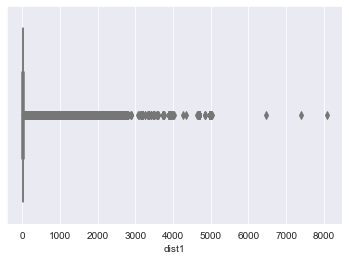

In [58]:
import seaborn as sns
sns.boxplot(tt_ddf.df.dist1)

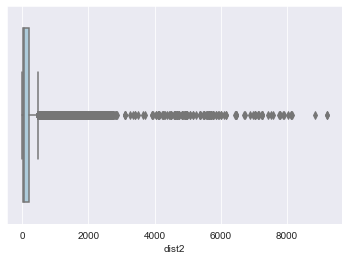

In [59]:
sns.boxplot(tt_ddf.df.dist2)

In [ ]:
#難しい話...これに関してディスカッションされてない

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(df_count.index,df_count.Count,color = 'black')

In [ ]:
#実験

In [ ]:
import numpy as np
a = [1,2,3,np.nan]

In [ ]:
b= {a[3]:1}

In [ ]:
b